In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, col, count, desc, max, min

In [2]:
# Initialize Spark session
spark = SparkSession.builder.appName("MyApp").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/11/14 00:05:00 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
orc_data = spark.read.format("orc").load("kafka_output/")


# 1) Product Analysis: Group and analyze products by category, brand, and price range.

In [3]:
product_analysis = orc_data.groupby('category_code', 'brand').agg({'price': 'avg'})
product_analysis.show(10)


OpenJDK 64-Bit Server VM warning: CodeCache is full. Compiler has been disabled.
OpenJDK 64-Bit Server VM warning: Try increasing the code cache size using -XX:ReservedCodeCacheSize=


CodeCache: size=131072Kb used=19301Kb max_used=19309Kb free=111770Kb
 bounds [0x000000010898c000, 0x0000000109c7c000, 0x000000011098c000]
 total_blobs=8447 nmethods=7559 adapters=801
 compilation: disabled (not enough contiguous free space left)


+--------------------+--------+------------------+
|       category_code|   brand|        avg(price)|
+--------------------+--------+------------------+
|electronics.smart...|    oppo| 302.8888324460261|
|                    |      ea| 68.92890645906827|
|       kids.carriage|  babyzz|225.46380384360455|
|                    |  veston| 36.77804644412188|
|                    |  maxler| 24.79519963104494|
|                    |bioderma|16.030129462849782|
|appliances.kitche...|   flama| 89.06770224988001|
|                    | dynamic|103.56231522271145|
|furniture.bedroom...|stolplit| 229.0481719316426|
|appliances.enviro...| airline| 57.05532041728795|
+--------------------+--------+------------------+
only showing top 10 rows



# 2)User Behavior Analysis: Investigate user sessions, their interactions, and behavior based on the events.

In [6]:
user_behavior = orc_data.groupBy('user_session').count()

# Displaying user behavior based on events
user_behavior.show()

+--------------------+-----+
|        user_session|count|
+--------------------+-----+
|85b88520-d38c-412...|    2|
|6e8ae906-2f71-41f...|    7|
|a1c24cac-d045-44e...|    4|
|65122323-c58f-467...|    4|
|a142e90d-f9ae-474...|   26|
|ad7c854e-e44d-4cc...|    8|
|2ee1b9b2-17c3-432...|   10|
|c7ed7188-c559-419...|   37|
|85f7ff08-861a-47c...|    7|
|429e917d-a4d5-423...|    6|
|cd49f84a-8eae-467...|   70|
|977e3feb-e0d9-499...|   22|
|052afb03-4470-4b1...|    3|
|61c4e2a4-1ab1-4ac...|    2|
|b930492f-ec5a-479...|    1|
|2a4a0103-62db-482...|    1|
|b73680a2-38e0-4f5...|    3|
|8c7490ff-8405-499...|    3|
|3ba9c2dd-800d-45a...|   44|
|2d7ade65-1d4b-455...|    5|
+--------------------+-----+
only showing top 20 rows



# 3)Pricing Trends: Identify pricing trends over the 'event_time' for various products or categories.

In [7]:
# Convert 'event_time' to a timestamp format
orc_data = orc_data.withColumn('event_time', col('event_time').cast('timestamp'))

# Grouping by time and category to observe price trends
price_trends = orc_data.groupBy('event_time', 'category_code').agg({'price': 'avg'})

# Displaying price trends over time for various categories
price_trends.show()

+-------------------+--------------------+------------------+
|         event_time|       category_code|        avg(price)|
+-------------------+--------------------+------------------+
|2019-09-30 20:00:00|appliances.enviro...|              33.2|
|2019-09-30 20:00:17|                    |            357.79|
|2019-09-30 20:00:18|electronics.video.tv|            193.03|
|2019-09-30 20:00:42|electronics.audio...|             33.21|
|2019-09-30 20:01:05|  computers.notebook|           1512.78|
|2019-09-30 20:01:43|appliances.enviro...|             90.07|
|2019-09-30 20:04:14|electronics.smart...|            975.57|
|2019-09-30 20:04:23|construction.tool...|              48.9|
|2019-09-30 20:05:07|                    |             86.21|
|2019-09-30 20:05:38|                    |             66.29|
|2019-09-30 20:06:20|  electronics.clocks|            133.85|
|2019-09-30 20:06:49|                    |            669.23|
|2019-09-30 20:06:54|electronics.smart...|396.38000000000005|
|2019-09

# 4)Event Type Frequency: Determine the frequency of different event types (e.g., 'view', 'click', 'purchase').

In [8]:
event_frequency = orc_data.groupBy('event_type').count()

# Displaying frequency of different event types
event_frequency.show()

+----------+---------+
|event_type|    count|
+----------+---------+
|  purchase|  1715406|
|      view|107676357|
|      cart|  4003978|
+----------+---------+



In [4]:
cleaned_data = orc_data.na.drop()


### Printing top category_brand combination for each user.


CodeCache: size=131072Kb used=20129Kb max_used=20162Kb free=110942Kb
 bounds [0x000000010918c000, 0x000000010a56c000, 0x000000011118c000]
 total_blobs=8554 nmethods=7664 adapters=805
 compilation: disabled (not enough contiguous free space left)


OpenJDK 64-Bit Server VM warning: CodeCache is full. Compiler has been disabled.
OpenJDK 64-Bit Server VM warning: Try increasing the code cache size using -XX:ReservedCodeCacheSize=


<Figure size 1000x600 with 0 Axes>

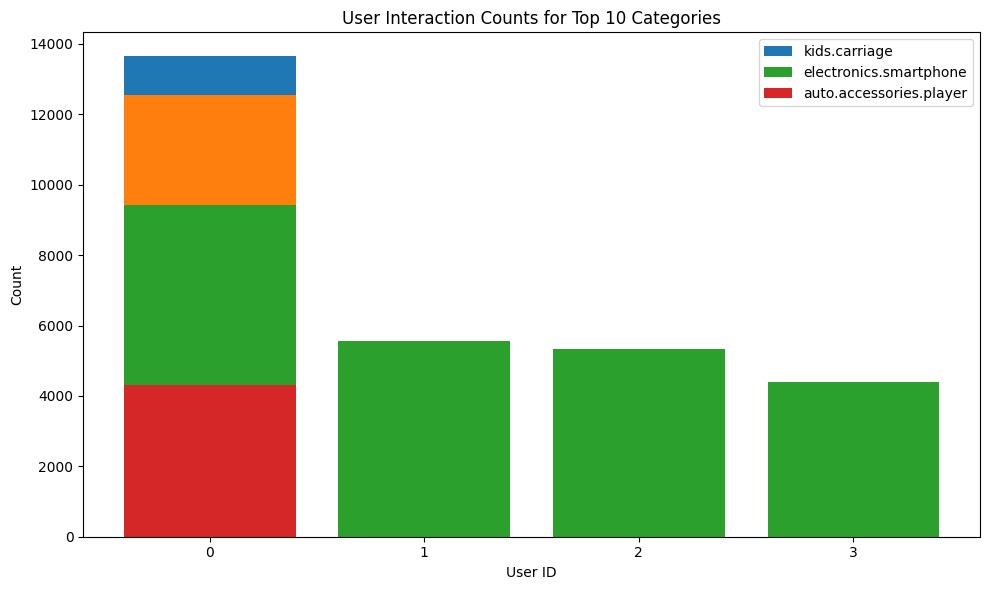

23/11/14 07:07:38 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 998202 ms exceeds timeout 120000 ms
23/11/14 07:07:38 WARN SparkContext: Killing executors is not supported by current scheduler.
23/11/14 07:21:54 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:642)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1223)
	at o

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import desc, col
import matplotlib.pyplot as plt

# Initialize Spark session
spark = SparkSession.builder.appName("user_category_interaction").getOrCreate()

# Assuming 'cleaned_data' is your existing Spark DataFrame

# Group by 'user_id', 'category_code', count interactions
user_category_interaction_count = cleaned_data.groupBy('user_id', 'category_code').count()

# Sort by count in descending order
user_category_interaction_count = user_category_interaction_count.orderBy(desc('count'))

# Collect the top 10 interactions
top_10_interactions = user_category_interaction_count.limit(10)

# Save the top 10 interactions to CSV format
# top_10_interactions.to_csv('spark_output/top_10_interactions.csv', index=False)

# Plotting the top 10 user interactions
plt.figure(figsize=(10, 6))

# Group by 'category_code', collect counts, and plot
category_counts = top_10_interactions.groupBy('category_code').agg({'count': 'collect_list'}).collect()

plt.figure(figsize=(10, 6))
for category in category_counts:
    category_code = category['category_code']
    counts = category['collect_list(count)']
    plt.bar([str(i) for i in range(len(counts))], counts, label=category_code)

plt.xlabel('User ID')
plt.ylabel('Count')
plt.title('User Interaction Counts for Top 10 Categories')
plt.legend()
plt.tight_layout()
plt.show()


# Collect the top 10 interactions
top_10_interactions = top_10_interactions.toPandas()

# Save the top 10 interactions to CSV format
top_10_interactions.to_csv('spark_output/top_10_interactions.csv', index=False)


In [19]:
ignore = list(top_10_interactions['category_code'])
ignore

['kids.carriage',
 '',
 'electronics.smartphone',
 'electronics.smartphone',
 'kids.carriage',
 '',
 'electronics.smartphone',
 'electronics.smartphone',
 'auto.accessories.player',
 '']

### Most Engaged Users within Categories and Brands:
Identify users who interact the most with specific categories or brands.

In [17]:
# Initialize Spark session
spark = SparkSession.builder.appName("Most_Engaged_Users").getOrCreate()

# Assuming 'orc_data' is your existing Spark DataFrame

# Group by 'user_id', 'category_code', 'brand' and count interactions
user_category_brand_interaction_count = cleaned_data.groupBy('user_id', 'category_code', 'brand').count()

# Find the maximum count for each category and brand
max_interactions_per_category_brand = user_category_brand_interaction_count.groupBy('category_code', 'brand') \
    .agg(max('count').alias('max_count'))

# Join to find the most engaged users for each category and brand
most_engaged_users = user_category_brand_interaction_count.join(max_interactions_per_category_brand,
                                                               on=['category_code', 'brand'], how='inner')

# Show the most engaged users within each category and brand in descending order of interaction counts
print(most_engaged_users.select('category_code', 'brand', 'user_id', 'max_count') \
    .orderBy('max_count', ascending=False).show())
print(most_engaged_users.select('category_code', 'brand', 'user_id', 'max_count') \
    .orderBy('max_count', ascending=True).show())

23/11/13 21:44:11 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.
23/11/13 21:48:43 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/11/13 21:48:43 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/11/13 21:48:43 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/11/13 21:48:43 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/11/13 21:48:43 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/11/13 21:48:43 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/11/13 21:48:43 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/11/13 21:48:43 WARN RowBasedKeyValueBatch: Calling spill()

+--------------------+-------+---------+---------+
|       category_code|  brand|  user_id|max_count|
+--------------------+-------+---------+---------+
|electronics.smart...|samsung|513805641|     5597|
|electronics.smart...|samsung|548680744|     5597|
|electronics.smart...|samsung|559687595|     5597|
|electronics.smart...|samsung|555271034|     5597|
|electronics.smart...|samsung|514652411|     5597|
|electronics.smart...|samsung|549264178|     5597|
|electronics.smart...|samsung|518873554|     5597|
|electronics.smart...|samsung|513115532|     5597|
|electronics.smart...|samsung|521773470|     5597|
|electronics.smart...|samsung|534538688|     5597|
|electronics.smart...|samsung|513816945|     5597|
|electronics.smart...|samsung|556736963|     5597|
|electronics.smart...|samsung|551047678|     5597|
|electronics.smart...|samsung|522742516|     5597|
|electronics.smart...|samsung|512819219|     5597|
|electronics.smart...|samsung|541760697|     5597|
|electronics.smart...|samsung|5

23/11/13 21:55:16 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/11/13 21:55:16 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/11/13 21:55:16 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/11/13 21:55:16 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/11/13 21:55:16 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/11/13 21:55:16 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/11/13 21:55:16 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/11/13 21:55:17 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/11/13 21:55:18 WARN RowBasedKeyValueBatch: Calling spill() on

+--------------------+------------+---------+---------+
|       category_code|       brand|  user_id|max_count|
+--------------------+------------+---------+---------+
|                    |    elkitorg|518334158|        1|
|                    |     bioline|539320069|        1|
|                    |      casato|570455936|        1|
|                    |     bioline|518049639|        1|
|                    |        dabo|565727446|        1|
|                    |     bioline|518921498|        1|
|apparel.shoes.bal...|       baden|516497044|        1|
|                    |   samsonite|577452466|        1|
|                    |      aufine|515906876|        1|
|                    |   samsonite|515986787|        1|
|                    |    ecocraft|512432515|        1|
|                    |   samsonite|522819804|        1|
|                    |       leeco|545656741|        1|
|                    |   samsonite|535729498|        1|
|                    |    ecocraft|520451797|   

#### Price Sensitivity within Categories: Evaluate user interactions with varying price ranges within different categories. This could reveal if users tend to engage more with specific price ranges or if certain categories are associated with higher-priced items.
##### This code will group the data by 'category_code' and calculate the average, maximum, and minimum prices within each category. It provides insights into how users interact with varying price ranges within different categories, offering an understanding of price sensitivity across categories. Adjustments or further analysis can be performed based on your specific requirements.

23/11/13 23:36:51 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


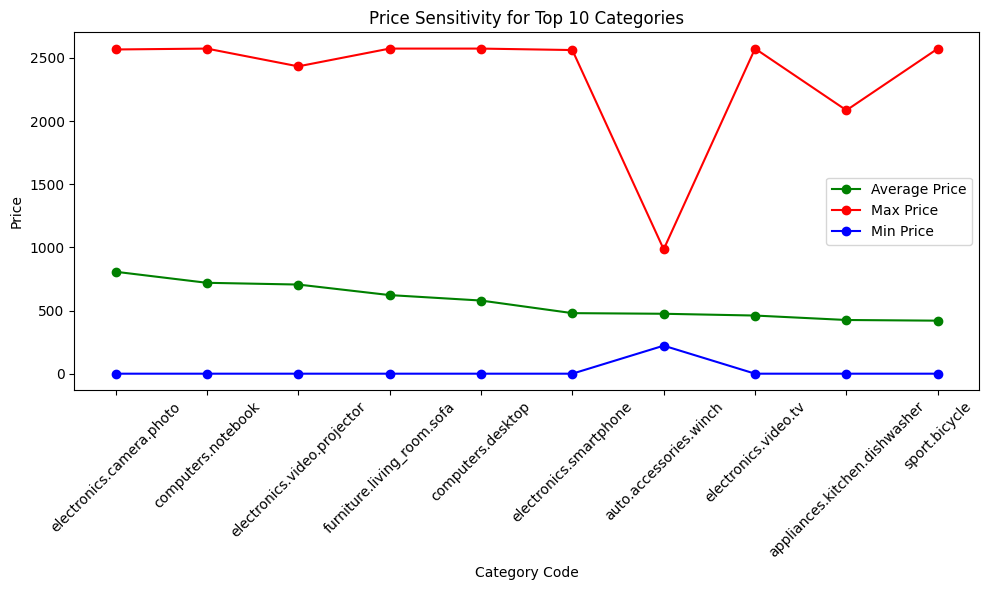

In [17]:
# Assuming 'cleaned_data' DataFrame is available and 'avg_prices' calculation is already done
spark = SparkSession.builder.appName("Average").getOrCreate()

price_sensitivity = cleaned_data.groupBy('category_code').agg(
    avg('price').alias('average_price'),
    max('price').alias('max_price'),
    min('price').alias('min_price')
)

# Get top 10 categories by average price
top_10_avg_price_categories = price_sensitivity.orderBy(desc('average_price')).limit(10).toPandas()

# Collect data for plotting
top_10_categories = top_10_avg_price_categories['category_code']
top_10_avg_prices = top_10_avg_price_categories['average_price']
top_10_max_prices = top_10_avg_price_categories['max_price']
top_10_min_prices = top_10_avg_price_categories['min_price']

# Creating a line plot for average prices per category for top 10 categories
plt.figure(figsize=(10, 6))
plt.plot(top_10_categories, top_10_avg_prices, marker='o', linestyle='-', color='green', label='Average Price')
plt.plot(top_10_categories, top_10_max_prices, marker='o', linestyle='-', color='red', label='Max Price')
plt.plot(top_10_categories, top_10_min_prices, marker='o', linestyle='-', color='blue', label='Min Price')

plt.xlabel('Category Code')
plt.ylabel('Price')
plt.title('Price Sensitivity for Top 10 Categories')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

# Save the top 10 categories to a CSV
top_10_avg_price_categories.to_csv('spark_output/top_10_categories_prices.csv', index=False)

In [22]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc, col

# Initialize Spark session
spark = SparkSession.builder.appName("Popular_Categories").getOrCreate()

## Group by 'category_id' and count interactions
popular_categories = cleaned_data.groupBy('category_id','category_code').agg(count('*').alias('interaction_count'))

# Sort by count in descending order
popular_categories = popular_categories.orderBy(desc('interaction_count'))

# Show the most frequently interacted categories
popular_categories.show()


23/11/13 22:56:24 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


+-------------------+--------------------+-----------------+
|        category_id|       category_code|interaction_count|
+-------------------+--------------------+-----------------+
|2053013555631882655|electronics.smart...|         28833250|
|2053013553559896355|                    |          5294285|
|2053013558920217191|  computers.notebook|          3394767|
|2053013554415534427|electronics.video.tv|          3374747|
|2053013554658804075|electronics.audio...|          3007758|
|2053013563810775923|appliances.kitche...|          2329638|
|2053013565983425517|appliances.enviro...|          2328665|
|2053013563651392361|                    |          2303605|
|2053013553341792533|  electronics.clocks|          1882651|
|2053013561579406073|  electronics.clocks|          1630396|
|2053013563911439225|appliances.kitche...|          1615724|
|2053013563693335403|                    |          1439352|
|2053013556168753601|                    |          1436253|
|2053013563970159485|   

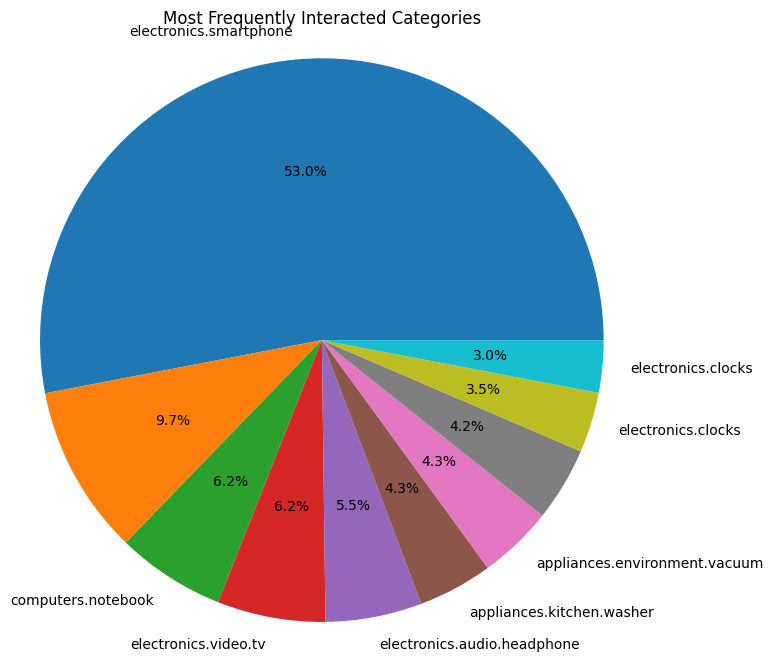

In [23]:
local_popular_categories = popular_categories.limit(10).toPandas()
local_popular_categories.to_csv('spark_output/top_10_categories.csv', index=False)


# Plotting a pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(local_popular_categories['interaction_count'], labels=local_popular_categories['category_code'], autopct='%1.1f%%')
plt.title('Most Frequently Interacted Categories')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()